In [24]:
import pandas as pd
import numpy as np




In [25]:
Y = pd.read_csv('covidmancandidates.csv', header = None)
Y[0][0]

72378

In [26]:
df = pd.read_csv('cov2vect.csv', header = None)
X = df

In [27]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model1 = model1.fit(X)


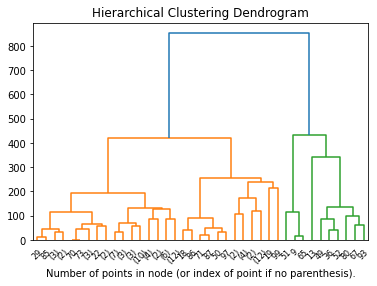

In [28]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model1, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [29]:
# setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(distance_threshold=150, n_clusters=None)

model1 = model1.fit(X)

In [30]:
labels = model1.labels_.tolist()
nocluster = set(labels)
totalcluster = len(nocluster)
totalcluster

10

In [31]:
cluster_dict = {}

i = 0
for i in range(len(labels)):
    if labels[i] not in cluster_dict.keys():
         cluster_dict[labels[i]] = [i]
    else:
          cluster_dict[labels[i]].append(i)
    i+=1

In [73]:
for i in range(totalcluster):
    print(len(cluster_dict[i]))

6
14
47
15
6
6
3
1
1
1


In [74]:
outlier_cluster_list = []
for i in range(totalcluster):
    if len(cluster_dict[i]) == 1:
        outlier_cluster_list.append(i)
    
print(outlier_cluster_list)

[7, 8, 9]


In [75]:
cluster_dict[outlier_cluster_list[2]]

[13]

In [76]:
cluster_dict[3]

[5, 16, 20, 22, 29, 44, 48, 59, 70, 73, 75, 76, 85, 91, 98]

In [77]:
X.iloc[cluster_dict[outlier_cluster_list[1]]]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
99,-7.626022,-4.128572,1.131209,-7.45321,17.592012,-1.980523,-25.096424,-6.670262,22.678345,-7.230431,...,1.87808,14.324747,24.905655,13.283847,-16.328968,-3.612324,0.018755,-24.570198,-25.178297,-7.857099


In [78]:
X.iloc[cluster_dict[0]]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
36,-2.842821,-7.283148,-8.195484,-3.361817,-0.170180,-14.048708,-20.615744,5.386586,4.971811,-9.965291,...,-8.207074,22.317694,10.801508,-1.180091,-24.374506,-22.304781,-16.400099,-14.952602,-23.439632,6.850525
49,-1.510650,-11.853647,-7.792691,-0.410092,1.146943,-13.605926,-15.206273,6.973811,-5.818600,-3.256252,...,-3.170748,23.321602,1.748697,-0.668680,-22.904808,-21.359655,-21.082687,-4.592968,-19.096619,1.815147
52,-3.133712,-9.604454,-5.200057,-2.700806,-3.944968,-13.415811,-18.491312,5.365893,2.323647,-10.838997,...,-7.698863,22.366323,4.479616,-4.316914,-21.128296,-21.875727,-18.296686,-13.043437,-20.476442,5.980033
67,2.846437,-16.234081,-12.217618,7.563805,0.290252,-20.288746,-22.412457,7.080382,4.257922,-9.163875,...,-2.827033,35.477215,3.276667,-6.103508,-32.770428,-31.553724,-25.469190,-9.113732,-34.077553,3.121256
80,3.039348,-18.442986,-14.053578,2.643454,-3.575144,-23.987926,-21.624962,7.949693,-3.601803,-7.911142,...,-5.174691,37.570328,2.690826,-4.951643,-34.910930,-33.956635,-28.261133,-9.394019,-33.380775,3.589008
93,1.085337,-11.033558,-7.929191,0.874161,-1.540242,-19.029455,-15.999878,5.124501,1.767690,-8.618482,...,-4.806884,31.166088,3.330698,-2.057195,-28.552628,-29.585005,-23.463331,-7.762007,-32.242500,6.155550


In [79]:
cluster_mean = np.zeros((totalcluster, X.iloc[1].size))
cluster_mean.shape

(10, 300)

In [80]:
cluster_mean = np.zeros((totalcluster, X.iloc[1].size))

for i in range(totalcluster):
    cluster_mean[i] = np.mean(X.iloc[cluster_dict[i]], axis=0)
    


In [81]:
from scipy.spatial import distance
cluster_mean[1]
distance.cosine(cluster_mean[0],cluster_mean[9])

0.11027010880399057

In [82]:
from scipy.spatial import distance
from PIL import Image
import glob
images_name = []
images_name = Y[0]
# for filename in glob.glob('images/*.png'): #assuming gif
#     images_name.append(int((filename.split("/")[1]).split(".")[0]))
  
images_name

0        72378
1        10219
2      5281078
3         4756
4       446541
        ...   
95        4413
96      445154
97    57336515
98      131411
99       65028
Name: 0, Length: 100, dtype: int64

In [83]:
from scipy.spatial import distance
from PIL import Image
import glob
image_list = []
for filename in images_name: #assuming gif
#     print(filename)
    im=Image.open("images/%s.png" % (filename))
#     images_name.append(int((filename.split("/")[1]).split(".")[0]))
    image_list.append(im)

    

In [84]:
image_list[2]
images_name[9]

78358496

In [85]:
# from scipy.spatial import distance
# from PIL import Image
# import glob
# image_list = []
# for filename in glob.glob('images/*.png'): #assuming gif
#     im=Image.open(filename)
#     image_list.append(im)
# for i in range(10):
#     for j in range(10):
#         dis = distance.cosine(cluster_mean[i],cluster_mean[j])
#         print(dis)
#     print('')    


# from scipy.spatial import distance
# from PIL import Image
# import glob
# image_list = []
# images_name = []
# for filename in glob.glob('images/*.png'): #assuming gif
# #     print(filename)
#     im=Image.open(filename)
#     images_name.append(int((filename.split("/")[1]).split(".")[0]))
#     image_list.append(im)

# images_name.sort()   
# images_name
    

In [86]:
# outlier need to change here for differnet experiment

from scipy.spatial import distance
outlier_cluster = outlier_cluster_list[2]
cluster_distance = []
for i in range(totalcluster):
    if i == outlier_cluster:
        continue
    cluster_distance.append((distance.euclidean(cluster_mean[outlier_cluster], cluster_mean[i]),outlier_cluster, i))
print('Euclidian distancce, Outlire, Other cluster')
cluster_distance

Euclidian distancce, Outlire, Other cluster


[(260.09104472140035, 9, 0),
 (363.8942480706019, 9, 1),
 (392.0745296639821, 9, 2),
 (401.4488164000013, 9, 3),
 (333.297357946725, 9, 4),
 (353.87600815961963, 9, 5),
 (310.32002759949495, 9, 6),
 (348.67858167993404, 9, 7),
 (354.094607408319, 9, 8)]

In [87]:
# import os
# from PIL import Image
# j = cluster_distance[0][1]
# os.makedirs(os.path.join("Cluster-images","outlier-cluster-{}".format(j)))
# for k in range(len(cluster_dict[j])):
#         l = cluster_dict[j][k]
#         image_list[l].save(r'Cluster-images/outlier-cluster-%d/%s.png' % (j,images_name[l]))

# for i in range(len(cluster_distance)):
#     j = cluster_distance[i][2]
#     os.makedirs(os.path.join("Cluster-images","cluster-{}".format(j)))

#     for k in range(len(cluster_dict[j])):
#         l = cluster_dict[j][k]
#         image_list[l].save(r'Cluster-images/cluster-%d/%s.png' % (j,images_name[l]))

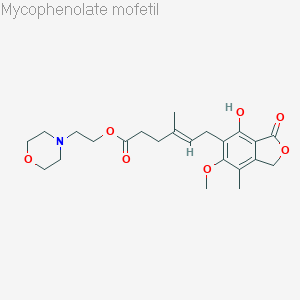

In [88]:
image_list[8]
image_list[cluster_dict[1][0]]

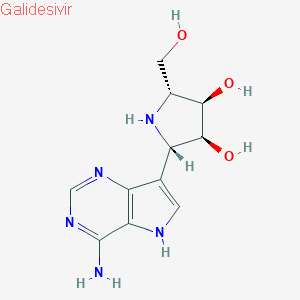

In [89]:
image_list[93]


In [90]:
cluster_distance.sort(key=lambda y: y[0])
cluster_distance = cluster_distance[:5]
print('Euclidian distance, Outlire, Other cluster')
cluster_distance

Euclidian distance, Outlire, Other cluster


[(260.09104472140035, 9, 0),
 (310.32002759949495, 9, 6),
 (333.297357946725, 9, 4),
 (348.67858167993404, 9, 7),
 (353.87600815961963, 9, 5)]

In [91]:
  def findCandidateClusters(k_nearest_cluster):
    closestCluster = k_nearest_cluster[0][2]
    closestDistance = k_nearest_cluster[0][0]
    candidateCluster = []
    rejectedCluster = []
    dist = distance.euclidean(cluster_mean[closestCluster],cluster_mean[k_nearest_cluster[0][1]])
#     print(dist)
    candidateCluster.append(k_nearest_cluster[0])
    for i in k_nearest_cluster:
        if i in rejectedCluster:
            print('rejected')
            print(rejectedCluster)
            continue
        for j in k_nearest_cluster:
            if j == i: continue
            dist_btwn = distance.euclidean(cluster_mean[i[2]],cluster_mean[j[2]])
            origin = cluster_mean[i[2]] + (- cluster_mean[i[2]])
            translate_outlier = cluster_mean[i[1]] + (- cluster_mean[i[2]])
            translate_cluster = cluster_mean[j[2]] + (- cluster_mean[i[2]])
            cos_dist = distance.cosine(translate_outlier, translate_cluster)
            print(dist_btwn)
            print(cos_dist)
            print(j)
            print('')
            if cos_dist < 1  :
                if j in candidateCluster:
                    continue
                candidateCluster.append(j)
            else:
                if j not in rejectedCluster:
                    rejectedCluster.append(j)
                if j in candidateCluster:
                    print(j)
                    print('is included') 
                    candidateCluster.remove(j)   
                    
        for i in candidateCluster:
            if i in rejectedCluster:
                candidateCluster.remove(i)

    return  candidateCluster   

In [92]:
neighborCluster = findCandidateClusters(cluster_distance)
neighborCluster

212.60363534409066
0.8503594518155092
(310.32002759949495, 9, 6)

125.16149487625327
1.4265973931219396
(333.297357946725, 9, 4)

209.64407000822777
1.0915037405544865
(348.67858167993404, 9, 7)

119.35746157997109
1.697960049531352
(353.87600815961963, 9, 5)

212.60363534409066
0.44030854154775123
(260.09104472140035, 9, 0)

236.87783119889482
0.7189249190326712
(333.297357946725, 9, 4)

259.848320022914
0.7380646149686267
(348.67858167993404, 9, 7)

277.86619332198734
0.7200432420766056
(353.87600815961963, 9, 5)

rejected
[(333.297357946725, 9, 4), (348.67858167993404, 9, 7), (353.87600815961963, 9, 5)]
rejected
[(333.297357946725, 9, 4), (348.67858167993404, 9, 7), (353.87600815961963, 9, 5)]
rejected
[(333.297357946725, 9, 4), (348.67858167993404, 9, 7), (353.87600815961963, 9, 5)]


[(260.09104472140035, 9, 0),
 (310.32002759949495, 9, 6),
 (348.67858167993404, 9, 7)]

In [93]:
print('Euclidean distance, Outlier, Other cluster')
neighborCluster

Euclidean distance, Outlier, Other cluster


[(260.09104472140035, 9, 0),
 (310.32002759949495, 9, 6),
 (348.67858167993404, 9, 7)]

In [96]:
import os
from PIL import Image
j = neighborCluster[0][1]
os.makedirs(os.path.join("Cluster-images","outlier-cluster-{}".format(j)))
for k in range(len(cluster_dict[j])):
        l = cluster_dict[j][k]
        image_list[l].save(r'Cluster-images/outlier-cluster-%d/%s.png' % (j,images_name[l]))

for i in range(len(neighborCluster)):
    j = neighborCluster[i][2]
    os.makedirs(os.path.join("Cluster-images","cluster-{}".format(j)))

    for k in range(len(cluster_dict[j])):
        l = cluster_dict[j][k]
        image_list[l].save(r'Cluster-images/cluster-%d/%s.png' % (j,images_name[l]))

In [ ]:
def findNearestObjectOfClusters(k_nearest_cluster):
    distance_all_cluster = []
    nearestObjects = []
    object_distance = []
    for j in range(len(k_nearest_cluster)):
        for i in range(len(cluster_dict[k_nearest_cluster[j]])):
            object_distance.append((distance.euclidean(cluster_mean[outlier_cluster[0]], X.iloc[cluster_dict[k_nearest_cluster[j]][i]]),outlier_cluster[0], k_nearest_cluster[j],  cluster_dict[k_nearest_cluster[j]][i]))
        #distance_all_cluster.append(object_distance)
        nearestObjects.append(min(object_distance, key=lambda tup: tup[0]))
        object_distance = []
    return  nearestObjects   

In [ ]:
k_nearest_cluster = list(zip(*cluster_distance[:5]))[2]
k_nearest_cluster

In [ ]:
nearestObjects = findNearestObjectOfClusters(k_nearest_cluster)
nearestObjects.sort(key=lambda y: y[0])
nearestObjects

In [ ]:
from scipy.spatial import distance
for i in range(100):
    for j in range(100):
        print(distance.cosine(X[i], X[j]))
    print('new loop')    

In [ ]:
def findCandidateObjectOfClusters(k_nearest_objects):
    closestObject = k_nearest_objects[0][3]
    closestDistance = k_nearest_objects[0][0]
    candidateObjects = []
    candidateObjects.append(k_nearest_objects[0])
    for j in range(len(k_nearest_objects)):
        #if j == 0: continue
        dist = distance.euclidean(X.iloc[closestObject], X.iloc[k_nearest_objects[j][3]])
        cos_dist = distance.cosine(X.iloc[closestObject], X.iloc[k_nearest_objects[j][3]])
        print(dist)
        if cos_dist >= .6 and dist  >=  closestDistance*.8 :
            candidateObjects.append(k_nearest_objects[j])
    return  candidateObjects   

In [ ]:
neighborObjects = findCandidateObjectOfClusters(nearestObjects)
neighborObjects